In [1]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
import os
os.getcwd()
os.chdir('D:\\')
os.getcwd()

'D:\\'

In [3]:
#store the data
df = pd.read_csv('tesla.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200


In [4]:
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
2192,15-03-2019,283.51001,283.723999,274.399994,275.429993,275.429993,14758243


In [5]:
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
2192,15-03-2019,283.51001,283.723999,274.399994,275.429993,275.429993,14758243


In [6]:
#create empty list 
days = list()
adj_close_prices = list()

In [7]:
#getget only the date and the adjusted close prices
df_days = df.loc[:,'Date']
df_adj_close = df.loc[:,'Adj Close']

In [8]:
# create a independent dats set( dates)
for day in df_days:
  days.append([int(day.split('-')[2])])
# create the dependent data set for adj_close price
for adj_close_price in df_adj_close:
  adj_close_prices.append(float(adj_close_price))

In [9]:
#show the days
days

[[2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 [2010],
 

In [22]:
lin_svr = SVR(kernel = 'linear', C = 1000)
lin_svr.fit(days,adj_close_prices)

SVR(C=1000, kernel='linear')

In [21]:
rbf_svr = SVR(kernel='rbf',C=1000,gamma=1)
rbf_svr.fit(days,adj_close_prices)

SVR(C=1000, gamma=1)

In [20]:
#Show the adj close price
#adj_close_prices

<function matplotlib.pyplot.show(close=None, block=None)>

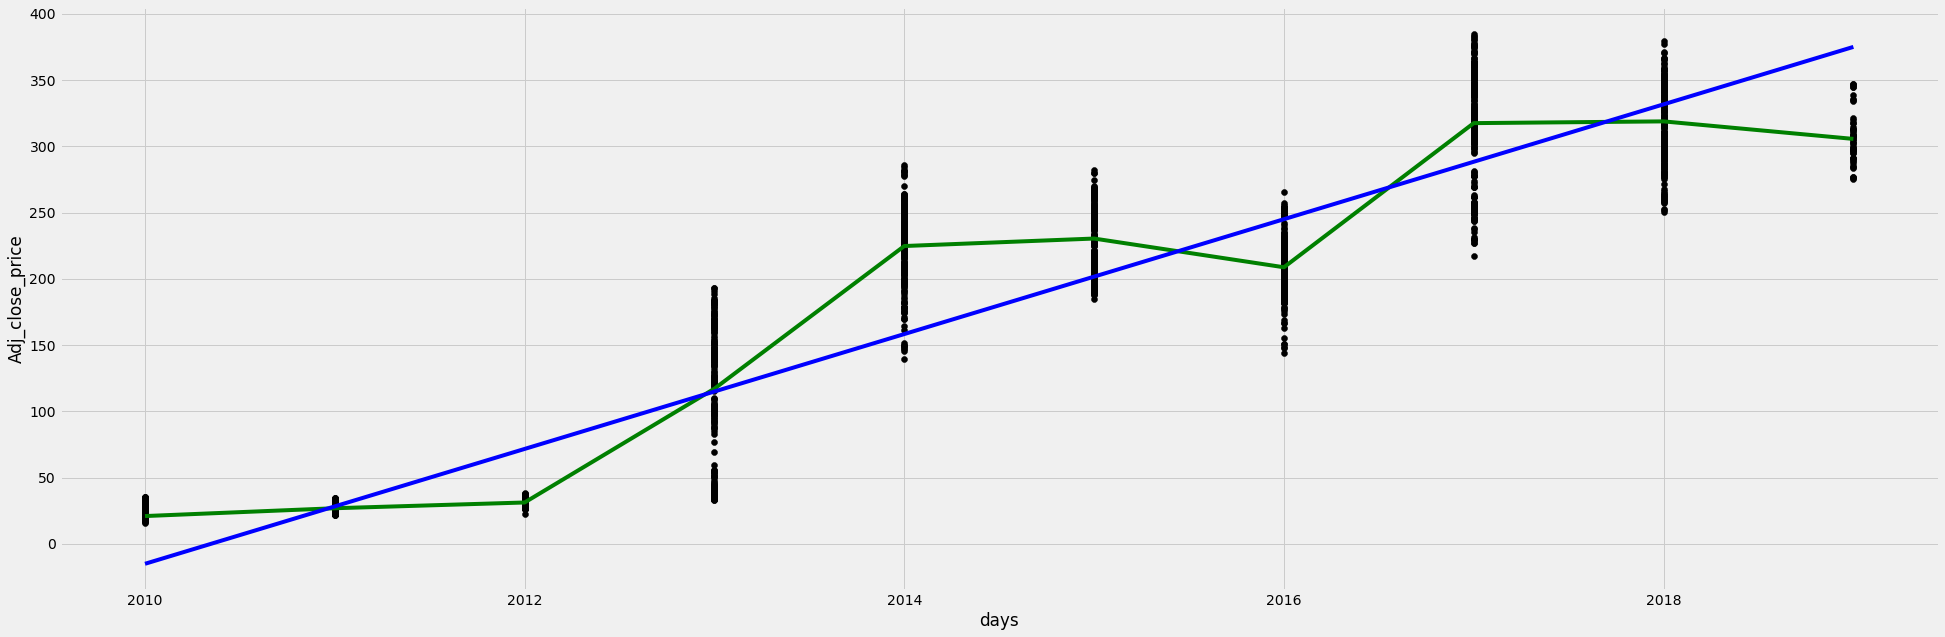

In [25]:
#plot the mosel
plt.figure(figsize=(30,10))
plt.scatter(days,adj_close_prices, color= 'black', label='Data')
plt.plot(days,rbf_svr.predict(days), color ='green', label='RBF model')
plt.plot(days,lin_svr.predict(days), color ='blue', label='linear model')
plt.xlabel('days')
plt.ylabel('Adj_close_price')
plt.show

In [26]:
#show the predicted price for given day
day = [[15]]
print('The RBF SVR predicted price:',rbf_svr.predict(day))
print('The linear SVR predicted price:',lin_svr.predict(day))

The RBF SVR predicted price: [179.02189897]
The linear SVR predicted price: [-86473.37994776]


In [27]:
print("The actual price",actual_price['Adj Close'][2192])

The actual price 275.429993
